<a href="https://colab.research.google.com/github/Rin-niee/MachineLearning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Тема 2: Статистика в действии и ее влияние на модель***

# 1. Анализ целевой переменной

**1.1. Импорт библиотек**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**1.2 Загрузка набора данных**

In [ ]:
df  = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


**1.3 Проверка наличия пропущенных значений, работа с пропусками числовых**

In [ ]:
print(df.isnull().sum()) #проверка на пропущенные значения

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size = 5, replace = True), 'AGE_50'] = np.nan

In [ ]:
print(df_test_nan.isnull().sum())

AGE_50       5
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
#Удаление пустых строк
df_drop = df_test_nan.dropna()
print("\n Удаление строк с пропусками")
print(df.isnull().sum())


 Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
#заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.AGE_50 =df_median.AGE_50.fillna(df_median.AGE_50.median())
print("\n Заполнение пропусков медианой")
print(df_median.isnull().sum())


 Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
#заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.AGE_50 = df_mean.AGE_50.fillna(df_median.AGE_50.mean())
print("\n Заполнение пропусков средним")
print(df_mean.isnull().sum())


 Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size = 5, replace = True), 'DEATH'] = np.nan
print(df_test_nan.isnull().sum())


AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        5
dtype: int64


⏰**Заполнение категориальных признаков**

In [ ]:
df_category = df_test_nan.copy()
df_category.DEATH = df_category.DEATH.fillna(df.DEATH.median())
print("\n Заполнение пропусков средним")
print(df_category.isnull().sum())


 Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


⏰**1.4. Выбор целевой переменной**

*IHD_DX - наличие ишемической болезни сердца, если показатель >=6, пациент находится в группе риска(осложнения, смерть)*

In [ ]:
df['risk_group'] = np.where(df['IHD_DX'] <=6, 1, 0).astype(int)

In [ ]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'risk_group'],
      dtype='object')

In [ ]:
Y = df['risk_group'] #целевая категориальная переменная
X = df.drop('risk_group', axis = 1) #переменная дя проверки влияния
X = X.drop('IHD_DX', axis = 1)

**1.5. Графический анализ**

In [ ]:
numeric_cols = X.select_dtypes(include= ['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


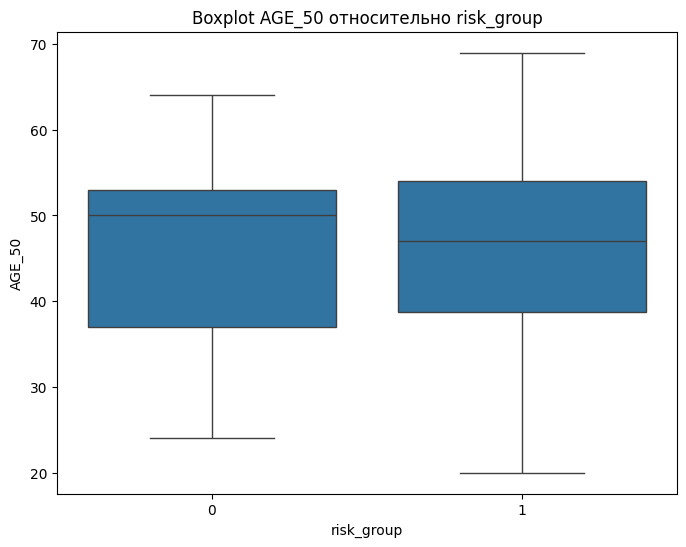

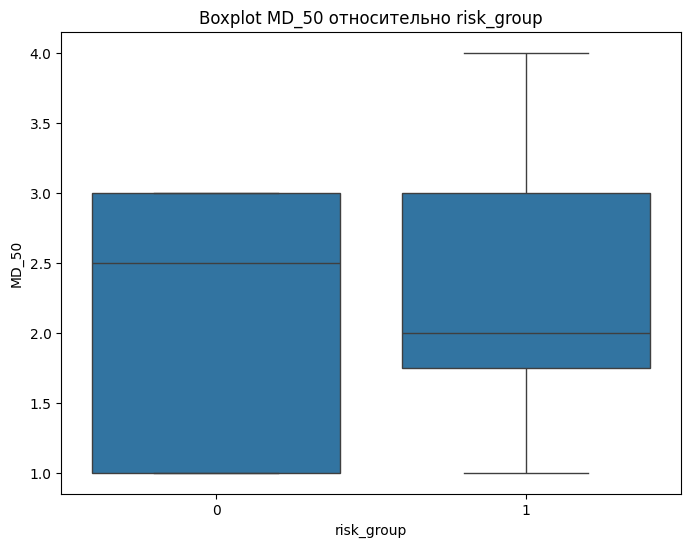

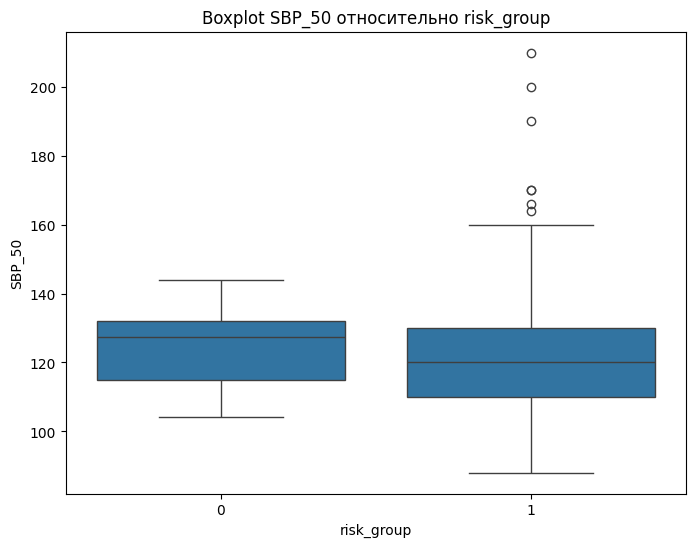

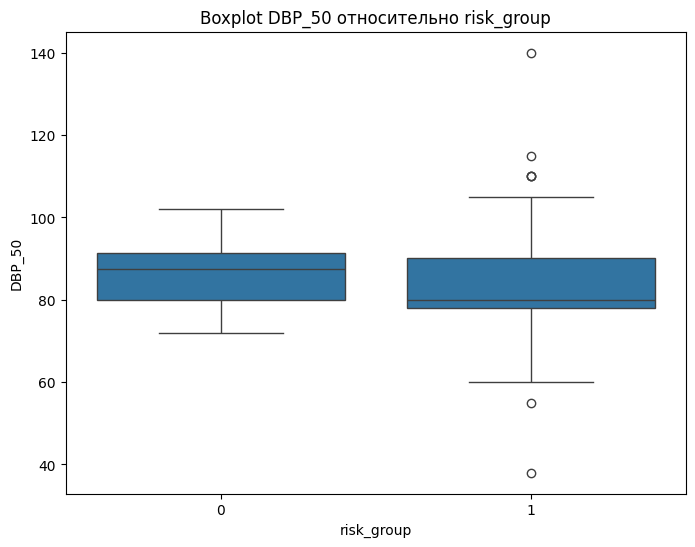

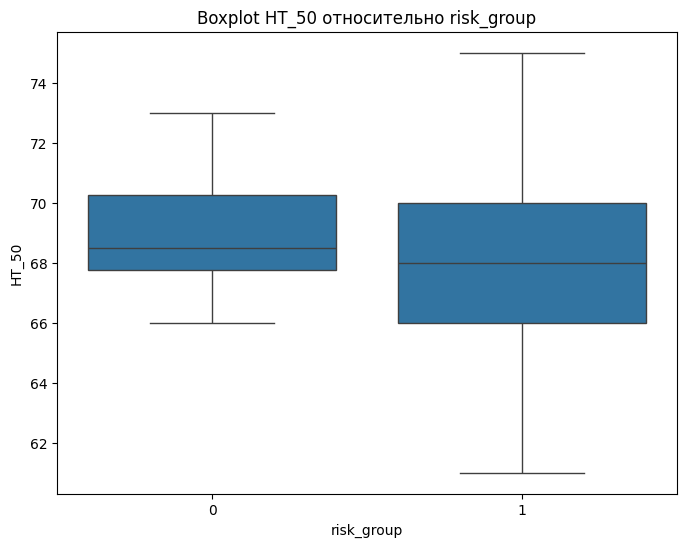

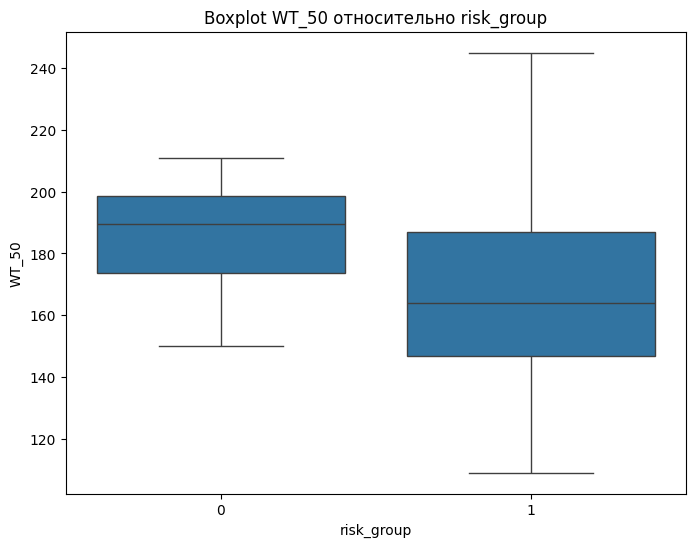

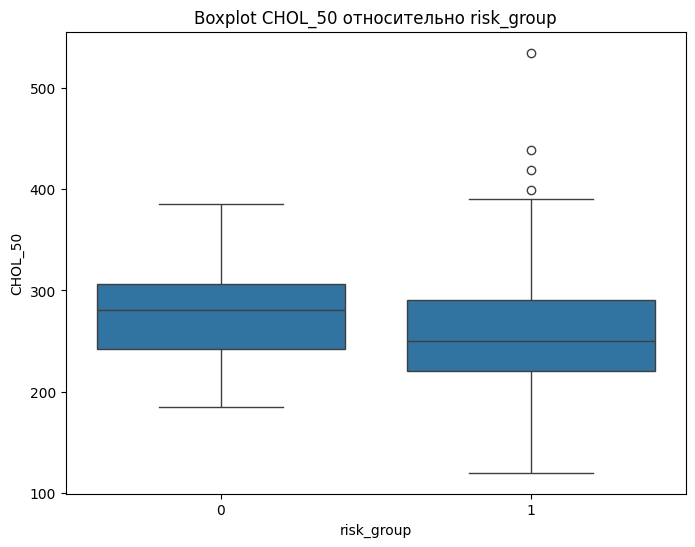

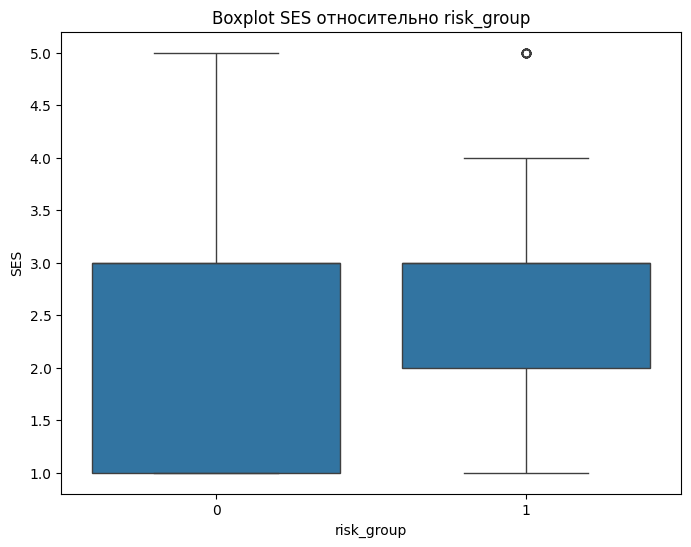

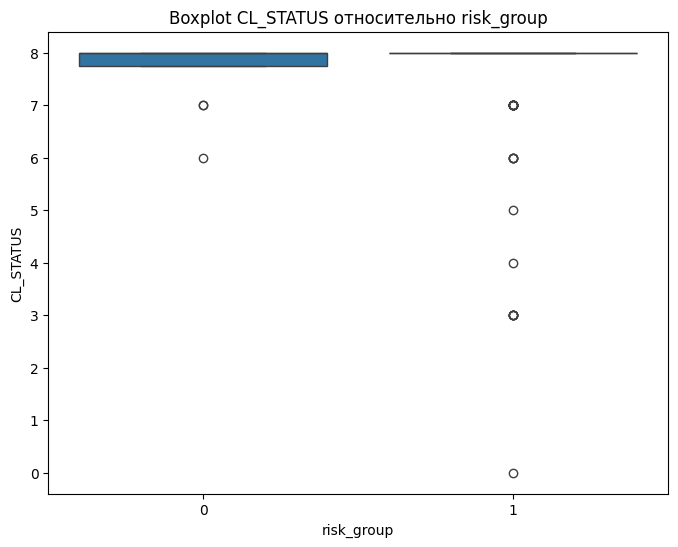

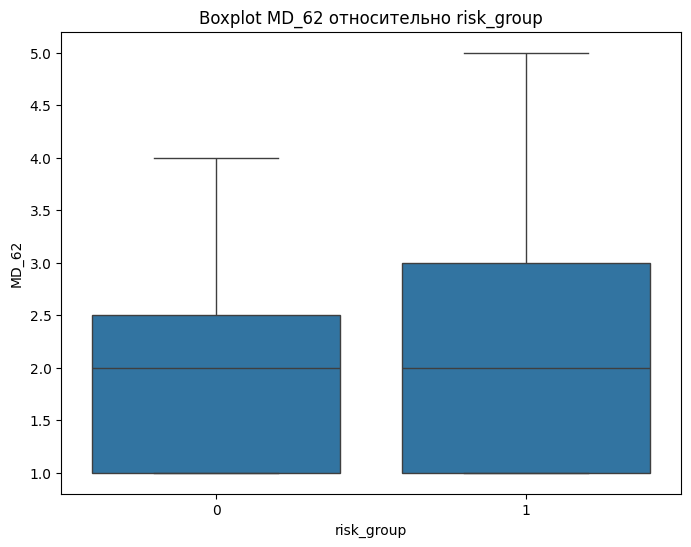

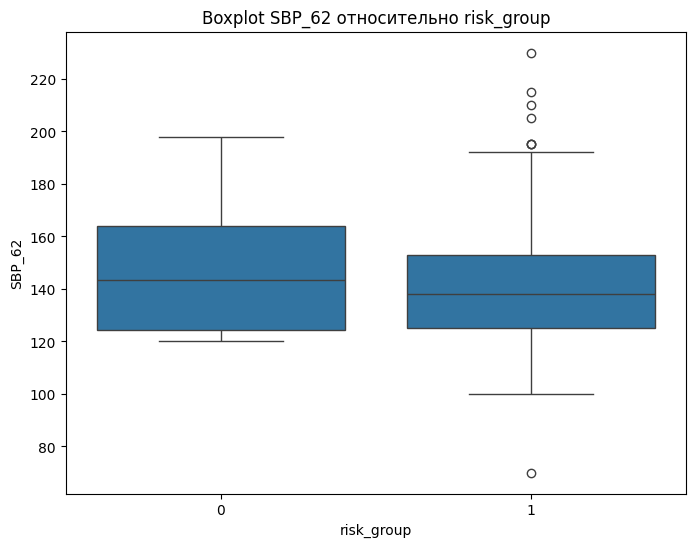

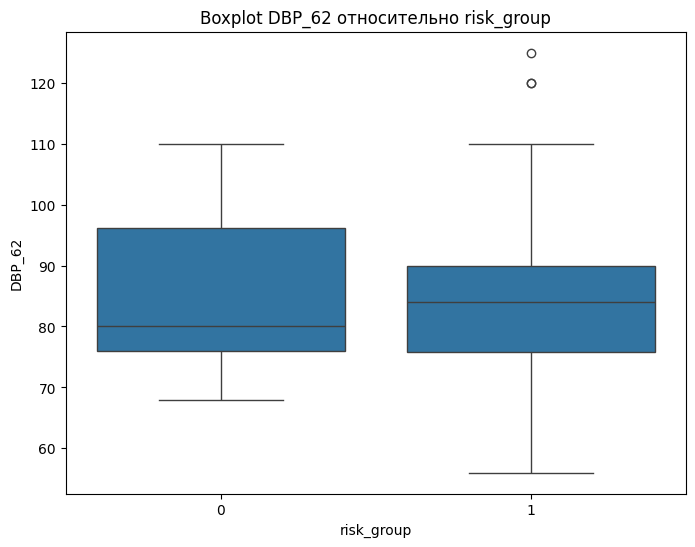

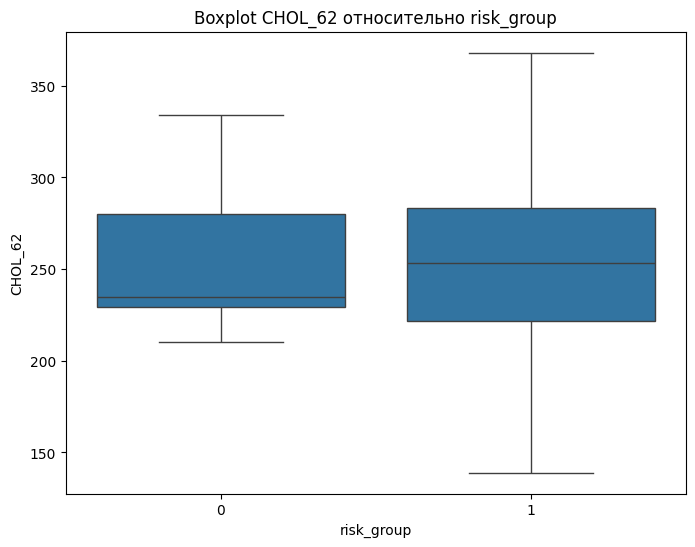

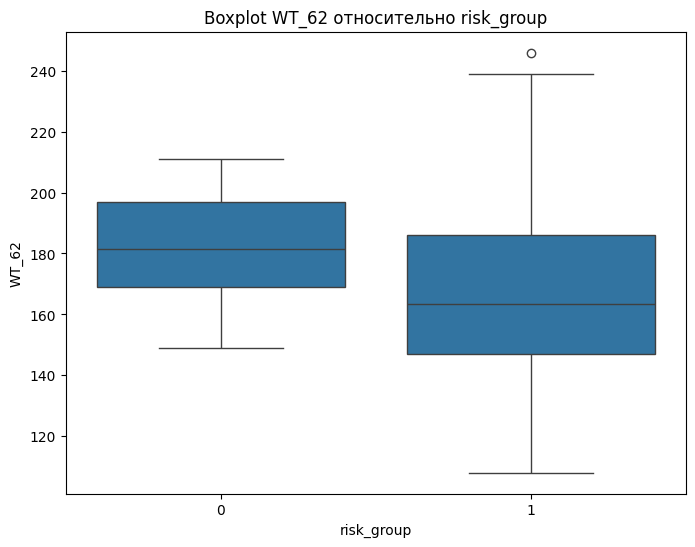

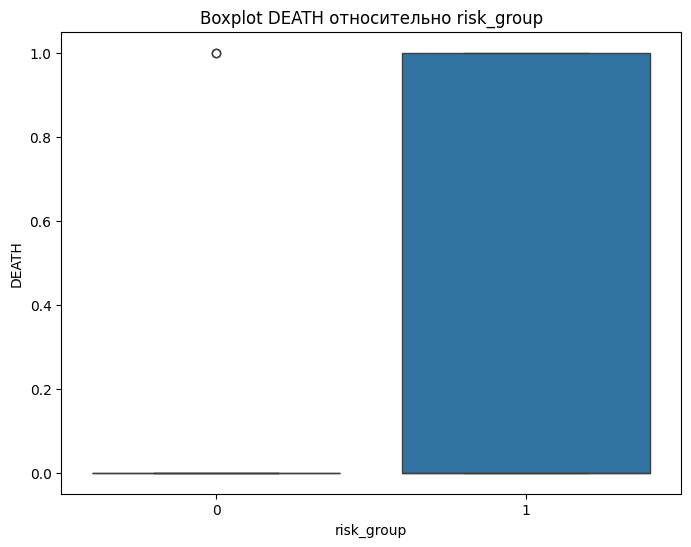

In [ ]:
#Boxplot относительно различных переменных в датасете
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='risk_group', y=col, data=df)
    plt.title(f'Boxplot {col} относительно risk_group')
    plt.show()

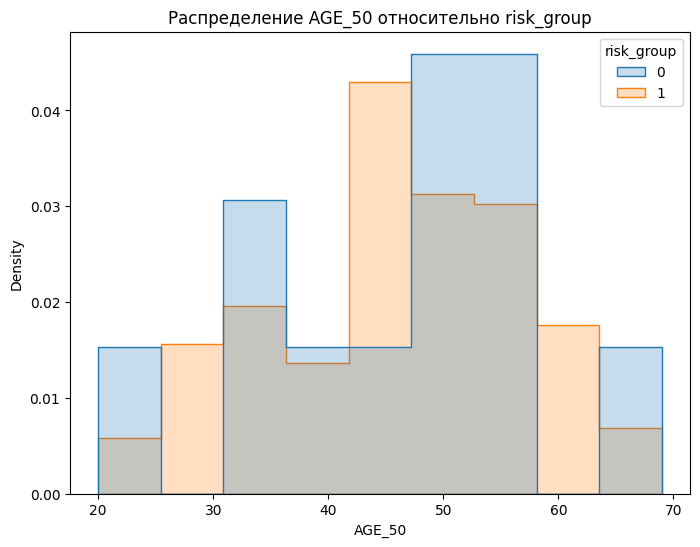

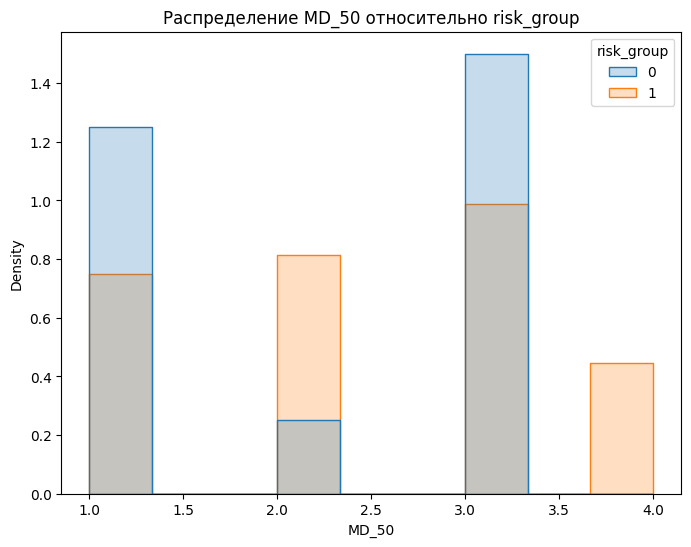

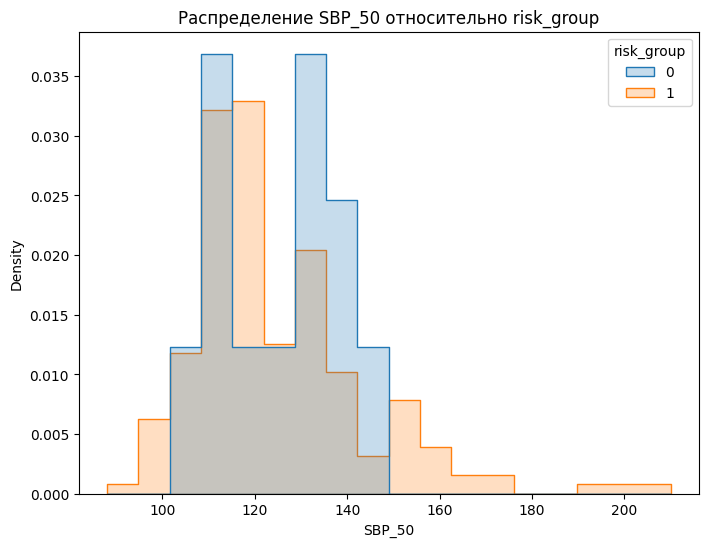

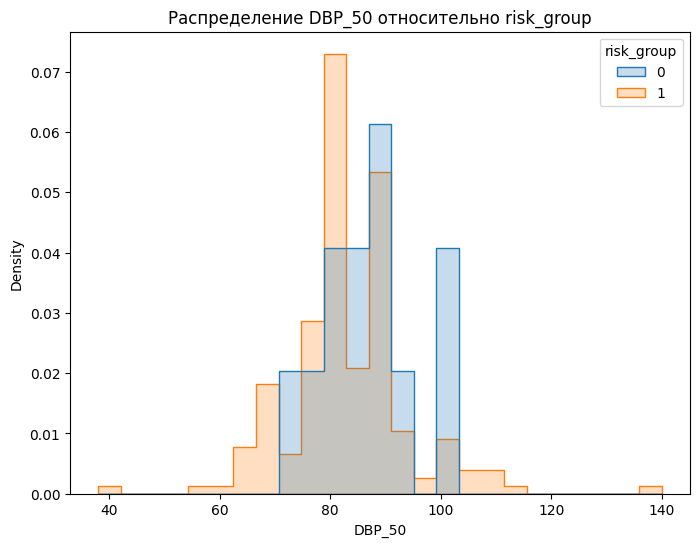

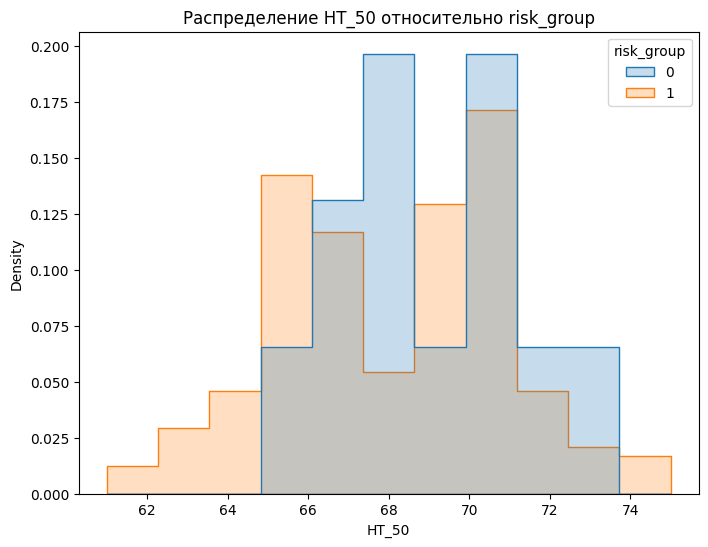

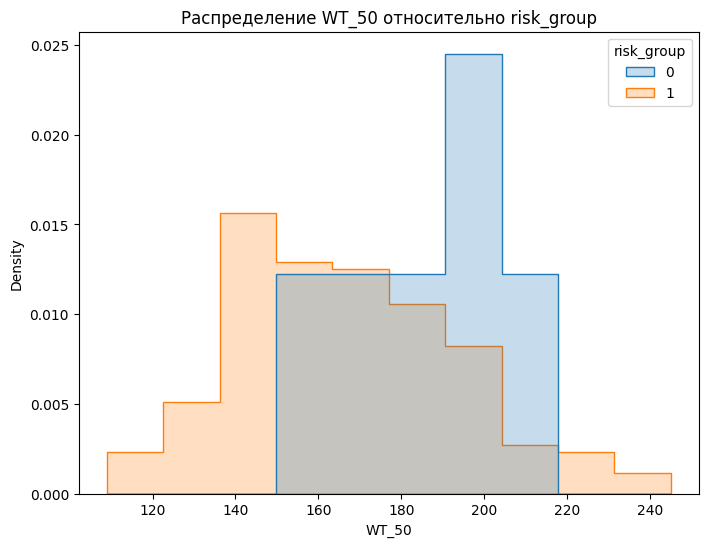

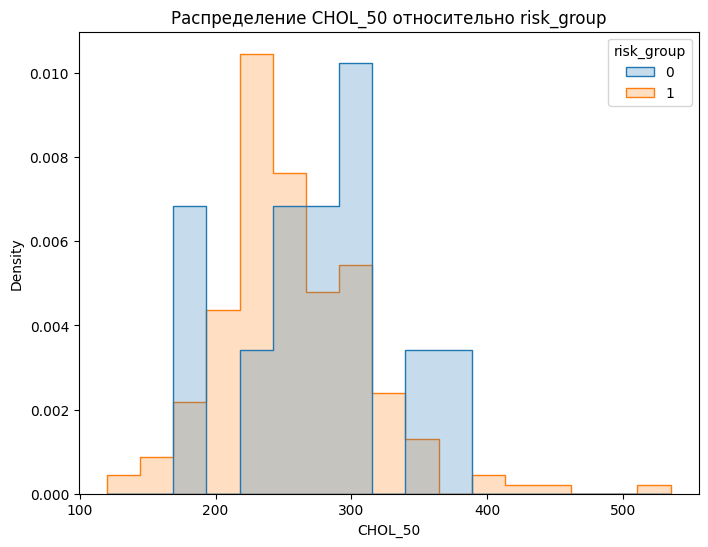

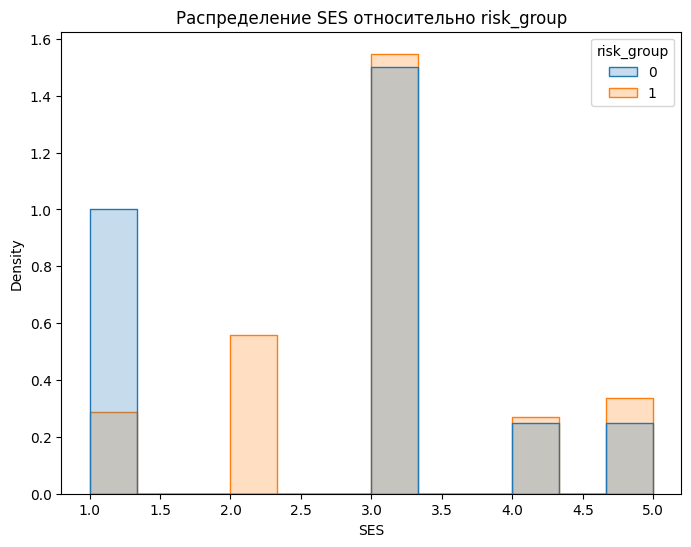

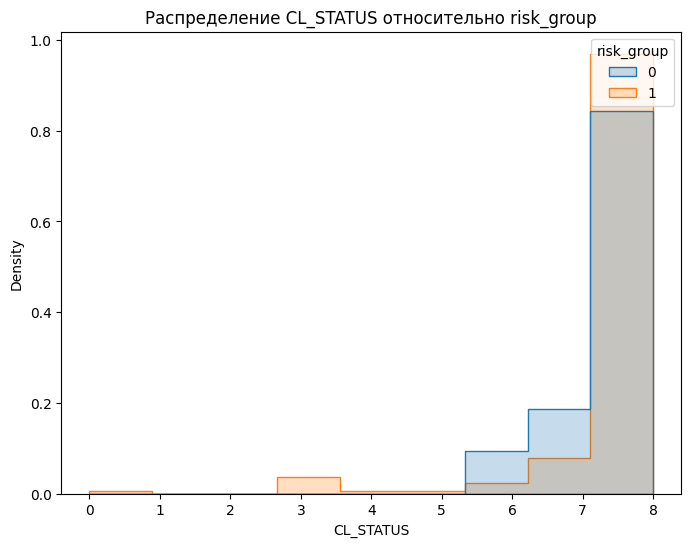

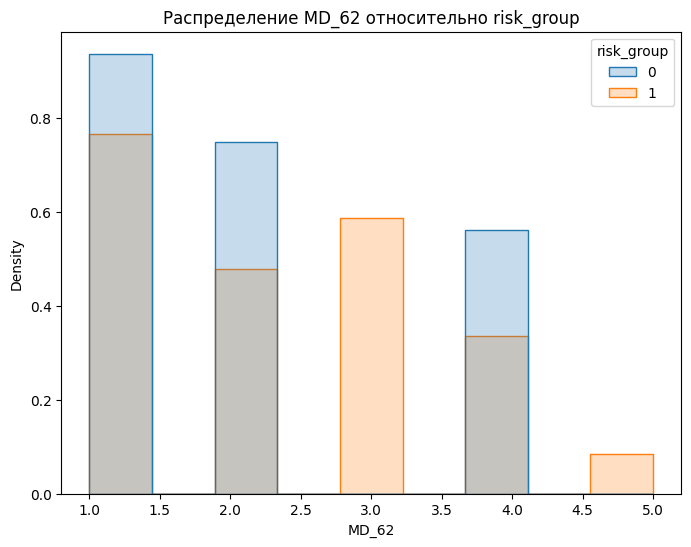

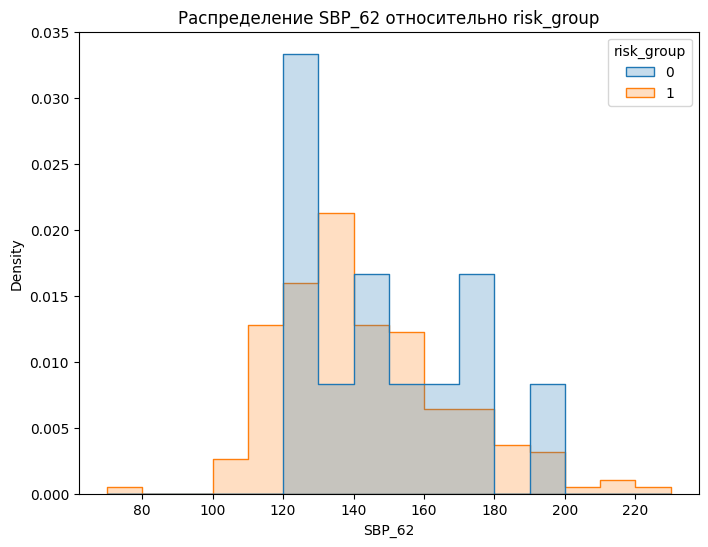

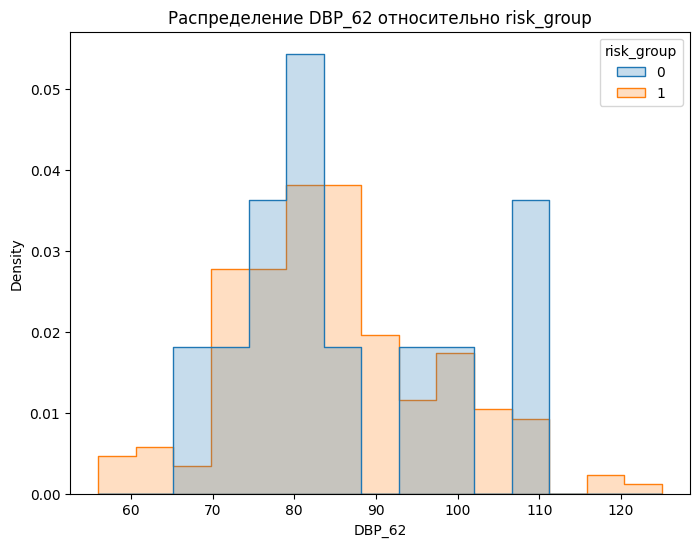

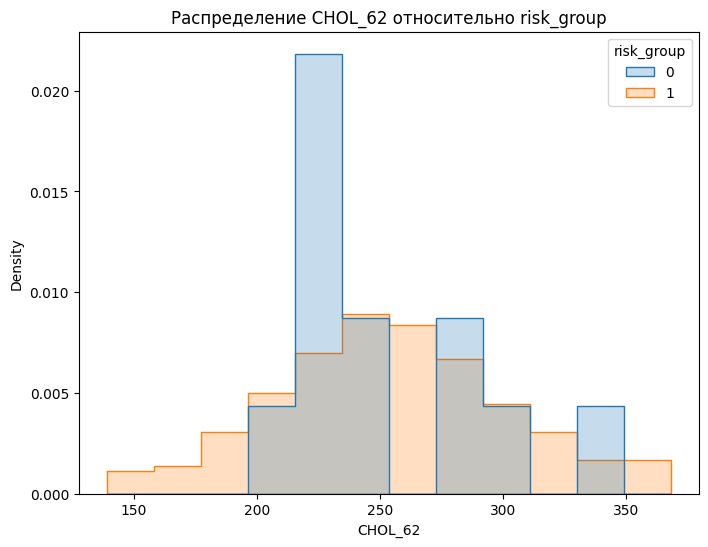

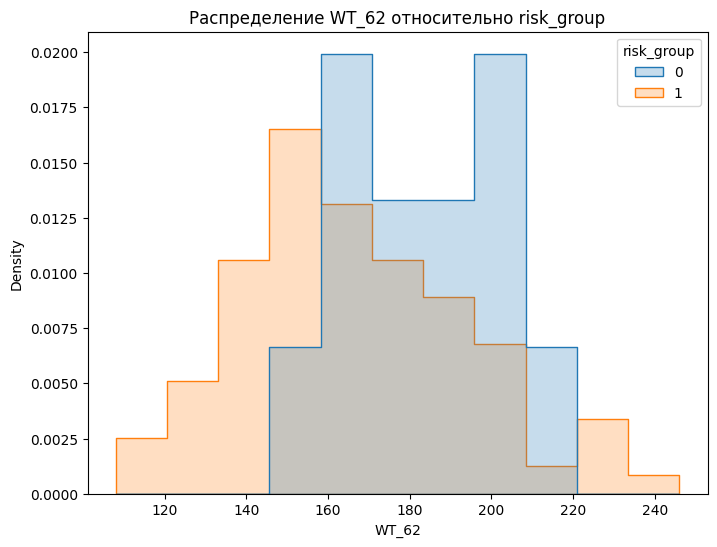

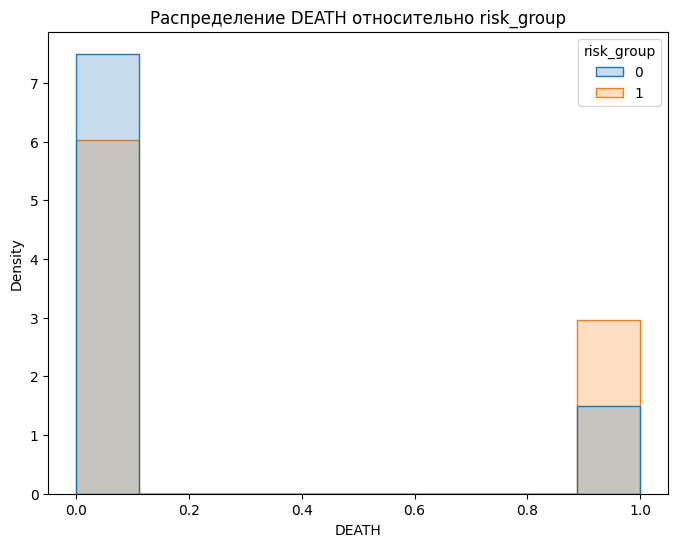

In [ ]:
#диаграммы распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='risk_group', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно risk_group')
    plt.show()

**Изменяем тип данных категориальных значений**

In [ ]:
df[['AGE_50', 'MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']] = df[['AGE_50', 'MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']].astype({'AGE_50':'category', 'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category', 'risk_group':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AGE_50      200 non-null    category
 1   MD_50       200 non-null    category
 2   SBP_50      200 non-null    int64   
 3   DBP_50      200 non-null    int64   
 4   HT_50       200 non-null    int64   
 5   WT_50       200 non-null    int64   
 6   CHOL_50     200 non-null    int64   
 7   SES         200 non-null    category
 8   CL_STATUS   200 non-null    category
 9   MD_62       200 non-null    category
 10  SBP_62      200 non-null    int64   
 11  DBP_62      200 non-null    int64   
 12  CHOL_62     200 non-null    int64   
 13  WT_62       200 non-null    int64   
 14  IHD_DX      200 non-null    category
 15  DEATH       200 non-null    category
 16  risk_group  200 non-null    category
dtypes: category(8), int64(9)
memory usage: 18.7 KB


⏰ Проанализировать график, выделить значимые признаки относительно **Y**

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('risk_group', observed=True)[df.select_dtypes(include=['int64']).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('risk_group', observed=True)[df.select_dtypes(include=['category']).columns].describe()

⏰ Подобное описание переменных

In [ ]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('risk_group', observed=True)[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для AGE_50:

            count  unique  top  freq
risk_group                          
0              12      10   51     2
1             188      44   57     9


Описательная статистика для MD_50:

            count  unique  top  freq
risk_group                          
0              12       3    3     6
1             188       4    3    62


Описательная статистика для SBP_50:

            count        mean        std    min    25%    50%    75%    max
risk_group                                                                 
0            12.0  125.250000  12.735955  104.0  115.0  127.5  132.0  144.0
1           188.0  124.664894  18.429210   88.0  110.0  120.0  130.0  210.0


Описательная статистика для DBP_50:

            count       mean        std   min   25%   50%    75%    max
risk_group                                                             
0            12.0  86.916667   9.365879  72.0  80.0  87.5  91.25  102.0
1           188.0  83.154255  1

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


AGE_50                 MD_50                   SES         ...  \
            count unique top freq count unique top freq count unique  ...   
risk_group                                                            ...   
0              12     10  51    2    12      3   3    6    12      4  ...   
1             188     44  57    9   188      4   3   62   188      5  ...   

           IHD_DX      DEATH                 risk_group                  
              top freq count unique top freq      count unique top freq  
risk_group                                                               
0               9    7    12      2   0   10         12      1   0   12  
1               0  132   188      2   0  126        188      1   1  188  

[2 rows x 32 columns]

####**1. AGE_50 – Возраст человека.**
Средний возраст пациентов из группы риска примерно 45 лет. На основании графика, можно сделать вывод, что возраст варьируется от 40 до 53 лет,оба графика с низким уровнем болезни и высоким имеет примерно одинаковый диапазон, следовательно, возраст мало влияет на степень ишемической болезни сердца

####**2. MD_50 – Медицинский диагноз или индекс здоровья.**
Средний индекс здоровья пациентов группы риска -2, график больше направлен вверх, на основании чего можно сделать вывод, что пациенты с высокой группы риска имеют высокий индекс здоровья(хуже), в то время как люди вне группе риска имеют в группе здоровья от 1 до 3.
####**3. SBP_50 – Систолическое артериальное давление.**
Пациенты в группе риска и вне ее имеют схожее систолическое давление, но у пациентов с высокой степенью болезни наблюдается разброс, на основании чего можно сделать вывод, что пациенты могут страдать повышенным систолическим давлением.
####**4. DBP_50 – Диастолическое артериальное давление.**
по аналогии с систолическим, пациенты в группе риска и вне ее имеют схожее диастолическое давление, с небольшим отклонением в меньшую сторону. У пациентов с высокой степенью болезни наблюдается разброс в обе стороны, что говорит о наличии пациентов как с более низким, так и с более высоким давлением у группы риска.
####**5. HT_50 – Рост.**
Люди в группе риска обладают меньшим ростом(170) в пределах от 140 до 185, в то время как более здоровые пациенты в пределах 175 до 2 метров.
####**6. WT_50 – Вес.**
Пациенты группы риска имеют средний вес 68 в больших пределах(от 66 до 70), чем здоровые люди.
На основании графика можно сказать, что люди в группе риска имеют меньший вес, чем здоровые люди.
####**7. CHOL_50 – Уровень холестерина.**
У пациентов в группе риска понижен холестерин(~250), имеется небольшой разброс
####**8. SES – Социально-экономический статус.**
Люди с более низким социально экономическим статусом имеют меньшую степень ишемической болезни, в то время как в группе риска средний статус варьируется от 3 до 3.
####**9. CL_STATUS – Клинический статус.**
Клинический статус мало влияет на группу риска, но у людей с высоким индексом болезни наблюдается разброс
####**10. MD_62 – Медицинский диагноз или индекс здоровья.**
Люди с группой риска увеличилась вариативность индекса здоровья, что говорит о большей подверженности болезни, средний индекс все еще находится в пределах 2
####**11. SBP_62 – Систолическое артериальное давление.**
Люди с вне группе риска имеют большее систолическое давление, у группы риска же средний показатель 140 и варьируется в очень маленьком промежутке, присутствует выброс
####**12. DBP_62 – Диастолическое артериальное давление.**
Уровень диастолического давления по аналогии с систолическим: средний уровень 85, маленький промежуток и наличие выбросов по сравнению с низкой степенью болезни
####**13. CHOL_62 – Уровень холестерина.**
Холестерин людей в группе риска повышен и находится средний предел чуть выше 250, промежуток стал больше, от 225 до 280-285
####**14. WT_62 – Вес.**
В группе риска оказываются люди с меньшим ростом но большей вариативностью, средний рост - 165, присутствует выброс. Люди с меньшей степенью имеют рост 180, что может сказать о некотором влиянии роста на наличие болезни
####**15. DEATH – Индикатор смерти**
Люди с высокой группой риска умирают чаще всего.
####**Вывод**
Группе риска подвержены люди с более низким ростом и низкой массой тела, при высокой степени болезни смертность крайне высока

# **2. Расчет теста Пирсона**

**2.1 Расчет коэффициентов элемент корреляции Пирсона для каждого признака**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
SBP_50,1.000000,0.747623,-0.162285,0.101327,0.013411,0.485679,0.316481,-0.182626,-0.013504
DBP_50,0.747623,1.000000,-0.034516,0.258936,0.049413,0.420695,0.416171,-0.105450,0.145620
HT_50,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.038900,0.071399,-0.043998,0.513601
WT_50,0.101327,0.258936,0.440524,1.000000,0.053567,0.080052,0.170940,-0.048215,0.816533
CHOL_50,0.013411,0.049413,-0.095610,0.053567,1.000000,0.003942,-0.035155,0.462148,-0.027414
SBP_62,0.485679,0.420695,-0.038900,0.080052,0.003942,1.000000,0.647622,0.062203,0.099427
DBP_62,0.316481,0.416171,0.071399,0.170940,-0.035155,0.647622,1.000000,0.182096,0.272572
CHOL_62,-0.182626,-0.105450,-0.043998,-0.048215,0.462148,0.062203,0.182096,1.000000,0.053954
WT_62,-0.013504,0.145620,0.513601,0.816533,-0.027414,0.099427,0.272572,0.053954,1.000000


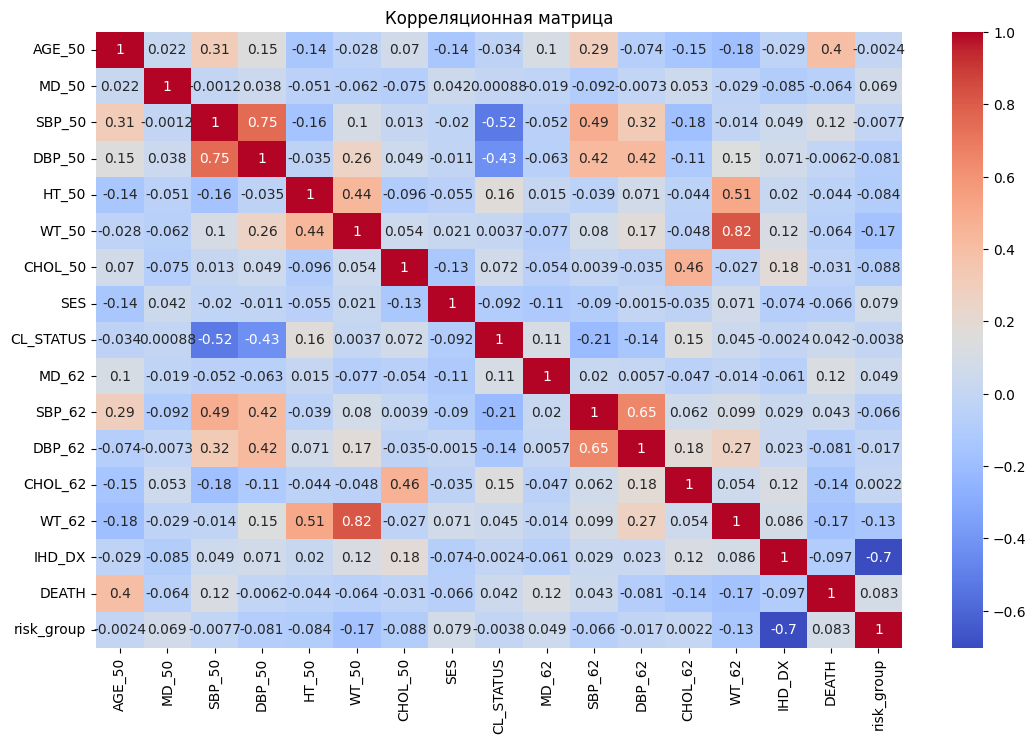

In [ ]:
# Корреляционная матрица
correlation_matrix = df[df.select_dtypes(include=[np.number, 'category']).columns].corr()
# Визуализация тепловой карты
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

**⏰ 1.2 Интерпретация результатов**

1. DBP_50 и SBP_50(0.747623)
Указывает на высокую связь между систолическим и диасолическим давлением при группе 50 - сила кровотока в артериях и между ударами сердца.
2. WT_62 и WP_50(0.816533)
Указывает на большую связь веса между категориями - с возрастом вес немного увеличивается, но остается в прежних границах - возможно убрать один из параметров веса за наличием избыточной информации
3. DBP_62 и SBP_62(0.647622)
Указывает на высокую связь между систолическим и диасолическим давлением при группе 62- сила кровотока в артериях и между ударами сердца
4. IHD_DX и risk group - сильная отрицательная корреляция между группой риска и степенью ишемического заболевания - возможно убрать одно из них.
Все параметры связаны между собой и коррелируют в пределах нормы, мультиколлинеарность отсутствует.


# **3. Машинное обучение**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = df.drop(columns='IHD_DX')
df = df.drop(columns='risk_group')
df

In [ ]:
# Выбор категориальных признаков
categorical_features = df.select_dtypes(include=['category']).columns.tolist()
print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['AGE_50', 'MD_50', 'SES', 'CL_STATUS', 'MD_62', 'DEATH']


In [ ]:
# Создаем копию данных
X_processed = df.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features)

In [ ]:
X_processed

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,AGE_50_20,...,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_1,MD_62_2,MD_62_3,MD_62_4,MD_62_5,DEATH_0,DEATH_1
0,110,65,64,147,291,120,78,271,146,False,...,False,False,True,False,False,False,True,False,False,True
1,130,72,69,167,278,122,68,250,165,False,...,True,False,False,False,True,False,False,False,False,True
2,120,90,70,222,342,132,90,304,223,False,...,False,False,True,True,False,False,False,False,False,True
3,120,80,72,229,239,118,68,209,227,False,...,False,False,True,False,True,False,False,False,False,True
4,118,74,66,134,243,118,56,261,138,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,148,300,115,65,273,152,False,...,False,False,True,True,False,False,False,False,True,False
196,110,70,69,137,120,112,76,198,153,False,...,False,False,True,False,True,False,False,False,True,False
197,130,80,66,150,210,130,85,274,158,True,...,False,False,False,True,False,False,False,False,True,False
198,140,84,66,138,130,148,88,160,157,False,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=[np.number]).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,AGE_50_20,...,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_1,MD_62_2,MD_62_3,MD_62_4,MD_62_5,DEATH_0,DEATH_1
0,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,False,...,False,False,True,False,False,False,True,False,False,True
1,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,False,...,True,False,False,False,True,False,False,False,False,True
2,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,False,...,False,False,True,True,False,False,False,False,False,True
3,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,False,...,False,False,True,False,True,False,False,False,False,True
4,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,False,...,False,False,True,True,False,False,False,False,True,False
196,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,False,...,False,False,True,False,True,False,False,False,True,False
197,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,True,...,False,False,False,True,False,False,False,False,True,False
198,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,False,...,True,False,False,False,True,False,False,False,True,False


**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9375
Точность на тестовой выборке: 0.9500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


        Feature  Coefficient
58        SES_1    -1.130648
39    AGE_50_53    -1.070076
72      MD_62_3     0.995092
3         WT_50    -0.905858
37    AGE_50_51    -0.854658
..          ...          ...
65  CL_STATUS_4     0.000000
12    AGE_50_24     0.000000
15    AGE_50_28     0.000000
9     AGE_50_20     0.000000
63  CL_STATUS_0     0.000000

[77 rows x 2 columns]


# **4. Построение модели логистической регрессии для предсказания пациентов группы риска**

**4.1 Кросс-валидация модели**

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9400
Отклонение точности: 0.0122


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

**4.2 Построение ROC-кривой**

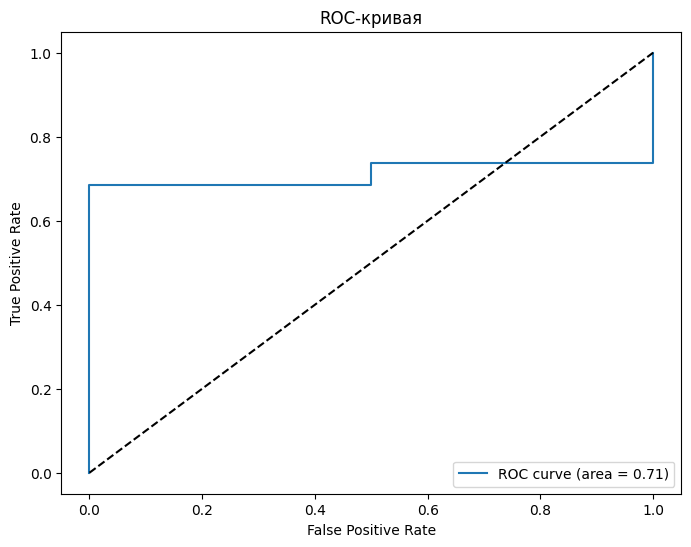

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()